<div style="color:white;display:fill;border-radius:8px;
            background-color:#a7d5ed;font-size:170%;
            font-family:Nexa;letter-spacing:4.5px;">    
    <h1 style="padding:10px;color:black;text-align: center"> 
        Variação do IBOVESPA por Governo Federal </h1> 
</div>


O objetivo aqui é analisar a variação do IBOVESPA nos períodos dos governos federais desde a estabilização da moeda, o primeiro governo do FHC. Adicionalmente vou considerar a variação do índice deflacionado para entender o impacto da inflação na economia nestes períodos. Já calculei o IBOVESPA deflacionado no post. As contas são simples:

- calcular os retornos do IBOVESPA mensais nos governos federais
- calcular estes retornos descontados da inflação (uso o IPCA)
- agrupar os retornos por períodos (governos federais) e calcular os retornos acumulados
- calcular os retornos anualizado nos períodos para facilitar a comparação entre governos com períodos diferentes


<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 1. IMPORTAÇÕES </h1>    
</div>

## 1.1. Instalações

In [1]:
COLAB = 'google.colab' in str(get_ipython()) 

if COLAB:        
    !pip install quandl

## 1.2. Bibliotecas 

In [2]:
import warnings
import sklearn.exceptions
import datetime

In [3]:
import numpy             as np
import pandas            as pd
import quandl            as Quandl
import matplotlib.pyplot as plt

In [4]:
from matplotlib.axes._axes    import _log as matplotlib_axes_logger

## 1.3. Funções

In [5]:
def jupyter_setting():
    
    %matplotlib inline

    #os.environ["WANDB_SILENT"] = "true" 
    #plt.style.use('bmh') 
    #plt.rcParams['figure.figsize'] = [20,15]
    #plt.rcParams['font.size']      = 13

    matplotlib_axes_logger.setLevel('ERROR')

    pd.options.display.max_columns = None
    #pd.set_option('display.expand_frame_repr', False)

    warnings.filterwarnings(action='ignore')
    warnings.simplefilter('ignore')
    warnings.filterwarnings('ignore')
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    warnings.filterwarnings('ignore', category=FutureWarning)
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    warnings.filterwarnings('ignore', category=UserWarning)
    warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
    warnings.filterwarnings("ignore", category= sklearn.exceptions.UndefinedMetricWarning)
    warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

    pd.options.mode.chained_assignment = None 
    pd.set_option('display.max_rows', 200)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.max_colwidth', 200)

    icecream = ["#00008b", "#960018","#008b00", "#00468b", "#8b4500", "#582c00"]
    #sns.palplot(sns.color_palette(icecream))

    colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen",
          "lightseagreen", "cornflowerblue", "mediumpurple", "palevioletred",
          "lightskyblue", "sandybrown", "yellowgreen", "indianred",
          "lightsteelblue", "mediumorchid", "deepskyblue"]

    # Colors
    dark_red   = "#b20710"
    black      = "#221f1f"
    green      = "#009473"
    myred      = '#CD5C5C'
    myblue     = '#6495ED'
    mygreen    = '#90EE90'    
    color_cols = [myred, myblue,mygreen]

    return icecream, colors, color_cols

icecream, colors, color_cols = jupyter_setting()

## 1.4. Dataset

Vou começar baixando as séries de IPCA e IBOVESPA (mensal) via Quandl.

In [6]:
df = Quandl.get(["BCB/433", "BCB/7845"], trim_start="1994-12-01")
df.columns = ["IPCA", "IBOVESPA"]
df.head()

,IPCA,IBOVESPA
Date,,
1994-12-31,1.71,43539.0
1995-01-31,1.70,38850.0
1995-02-28,1.02,32708.0
1995-03-31,1.55,29789.0
1995-04-30,2.43,38137.0


In [7]:
df.tail()

,IPCA,IBOVESPA
Date,,
2022-04-30,1.06,NaN
2022-05-31,0.47,NaN
2022-06-30,0.67,NaN
2022-07-31,-0.68,NaN
2022-08-31,-0.36,NaN


In [8]:
df = df.dropna()

<div class="alert alert-block alert-info" style="border-radius:15px">
<p style="color: black; font-family: Arial Black">NOTA:</p>
    
O primeiro ponto da série é 1994-12-31, que representa o fim do Governo Itamar Franco, pois dessa forma é possível calcular os retornos desde o primeiro mês do governo FHC. <p> <br>

A seguir os retornos do índice são calculados (<b>IBOVESPA_D</b>) e deflacionados (<b>IBOVESPA_D_DEFL</b>).
    
</div>

In [9]:
df["IBOVESPA_D"]      = df["IBOVESPA"].diff()/ df["IBOVESPA"].shift(1)
df["IBOVESPA_D_DEFL"] = (1 + df["IBOVESPA_D"])/(1 + df["IPCA"]/100) - 1
df = df.dropna()
df

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL
Date,,,,
1995-01-31,1.70,38850.0,-0.107697,-0.122612
1995-02-28,1.02,32708.0,-0.158095,-0.166596
1995-03-31,1.55,29789.0,-0.089244,-0.103145
1995-04-30,2.43,38137.0,0.280238,0.249866
1995-05-31,2.67,37205.0,-0.024438,-0.049808
...,...,...,...,...
2019-04-30,0.57,96353.0,0.009841,0.004118
2019-05-31,0.13,97030.0,0.007026,0.005719
2019-06-30,0.01,100967.0,0.040575,0.040471


Como o objetivo é agrupar os dados pelos períodos dos governos federais, vou criar uma função governo que recebe uma data e retorna o governo vigente. Em seguida eu aplico essa função ao índice do DataFrame e crio uma coluna chamada GOVERNO.

In [10]:
def governo(data):
    
    data = data.date()
    
    if data >= datetime.date(1995, 1, 1) and data <= datetime.date(1998, 12, 31):
        return 'FHC 1'
    elif data >= datetime.date(1999, 1, 1) and data <= datetime.date(2002, 12, 31):
        return 'FHC 2'
    elif data >= datetime.date(2003, 1, 1) and data <= datetime.date(2006, 12, 31):
        return 'LULA 1'
    elif data >= datetime.date(2007, 1, 1) and data <= datetime.date(2010, 12, 31):
        return 'LULA 2'
    elif data >= datetime.date(2011, 1, 1) and data <= datetime.date(2014, 12, 31):
        return 'DILMA 1'
    elif data >= datetime.date(2015, 1, 1) and data < datetime.date(2016, 5, 12):
        return 'DILMA 2'
    elif data >= datetime.date(2016, 5, 12) and data <= datetime.date(2016, 12, 31):
        return 'TEMER'
    elif data >= datetime.date(2018, 1, 1) and data <= datetime.date(2021, 12, 31):
        return 'BOLSONARO 1'
    else:
        return None

df['GOVERNO'] = df.index.map(governo)

In [11]:
df.head()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL,GOVERNO
Date,,,,,
1995-01-31,1.70,38850.0,-0.107697,-0.122612,FHC 1
1995-02-28,1.02,32708.0,-0.158095,-0.166596,FHC 1
1995-03-31,1.55,29789.0,-0.089244,-0.103145,FHC 1
1995-04-30,2.43,38137.0,0.280238,0.249866,FHC 1
1995-05-31,2.67,37205.0,-0.024438,-0.049808,FHC 1


Agora eu agrupo (groupby) pela GOVERNO e sumarizo os dados com a função aggregate calculando o retorno acumulado em cada período de governo federal.

In [12]:
df_gov = df.groupby('GOVERNO')
df_gov.head()

,IPCA,IBOVESPA,IBOVESPA_D,IBOVESPA_D_DEFL,GOVERNO
Date,,,,,
1995-01-31,1.70,38850.0,-0.107697,-0.122612,FHC 1
1995-02-28,1.02,32708.0,-0.158095,-0.166596,FHC 1
1995-03-31,1.55,29789.0,-0.089244,-0.103145,FHC 1
1995-04-30,2.43,38137.0,0.280238,0.249866,FHC 1
1995-05-31,2.67,37205.0,-0.024438,-0.049808,FHC 1
...,...,...,...,...,...
2018-01-31,0.29,84912.0,0.111385,0.108171,BOLSONARO 1
2018-02-28,0.32,85353.0,0.005194,0.001987,BOLSONARO 1
2018-03-31,0.09,85365.0,0.000141,-0.000759,BOLSONARO 1


Vou calcular o retorno acumulado das colunas IBOVESPA_D e IBOVESPA_D_DEFL passando para a função aggregate a função de retorno acumulado abaixo:

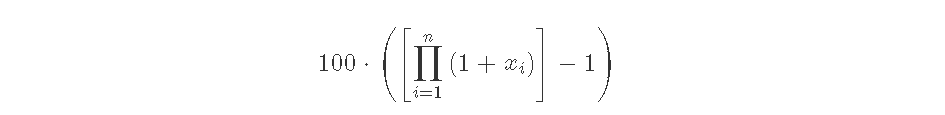


que realiza o produtório do fator de captalização dos retornos e multiplico o resultado por 100 para obter o número em percentual.

In [13]:
df_gov_agg = df_gov[['IBOVESPA_D', 'IBOVESPA_D_DEFL']].aggregate(lambda x: 100*(np.prod(1 + x) - 1))
df_gov_agg

,IBOVESPA_D,IBOVESPA_D_DEFL
GOVERNO,,
BOLSONARO 1,32.370880,24.436931
DILMA 1,-27.843992,-43.199362
DILMA 2,7.804907,-5.655127
FHC 1,-84.418567,-89.138794
FHC 2,66.096698,18.739626
LULA 1,294.684061,207.855809
LULA 2,55.833877,27.511680
TEMER,11.717678,8.521060


As colunas IBOVESPA_D e IBOVESPA_D_DEFL representam os retornos totais nos períodos dos governos federais. Já é possível notar duas coisas: o primeiro governo do Lula apresenta um retorno muito grande e os governos estão fora de ordem cronológica. Vamos colocar os governos em ordem cronológica para visualizar os dados de forma coerente. Para ordenar os dados por governos de forma cronológica eu vou criar a função sort_by_governo que recebe um DataFrame e o retorna ordenado.

In [14]:
def sort_by_governo(dx):
    governos = ['FHC 1', 'FHC 2', 'LULA 1', 'LULA 2', 'DILMA 1', 'DILMA 2', 'TEMER', 'BOLSONARO 1']
    mapping = {gov: i for i, gov in enumerate(governos)}
    key = dx.index.map(lambda x: mapping[x])
    return dx.iloc[key.argsort()]

df_gov_agg = sort_by_governo(df_gov_agg)
df_gov_agg

,IBOVESPA_D,IBOVESPA_D_DEFL
GOVERNO,,
FHC 1,-84.418567,-89.138794
FHC 2,66.096698,18.739626
LULA 1,294.684061,207.855809
LULA 2,55.833877,27.511680
DILMA 1,-27.843992,-43.199362
DILMA 2,7.804907,-5.655127
TEMER,11.717678,8.521060
BOLSONARO 1,32.370880,24.436931


Com os dados ordenados vamos visualizá-los em um gráfico de barras.

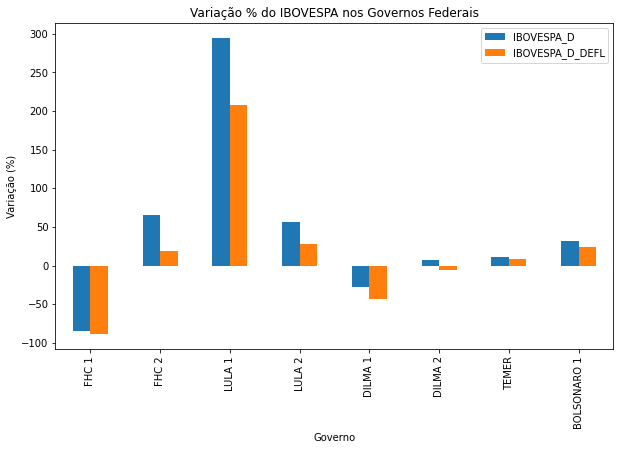

In [15]:
ax = df_gov_agg[['IBOVESPA_D', 'IBOVESPA_D_DEFL']].plot(kind='bar', 
                                                        figsize=(10,6),
                                                        title="Variação % do IBOVESPA nos Governos Federais")
ax.set_xlabel("Governo")
ax.set_ylabel("Variação (%)");

<div class="alert alert-block alert-info" style="border-radius:15px">
<p style="color: black; font-family: Arial Black">NOTA:</p> 
    
É possível observar diversas coisas, vou listar os pontos que mais me chamaram a atenção:

- A inflação no governo DILMA 2 comeu todo o retorno entrege pelo IBOVESPA;
- O pior período para o IBOVESPA foi o primeiro governo do FHC;
- O governo LULA 1 apresentou um retorno espetacular;
- Os governos FHC 2 e LULA 2 apresentam retornos semelhantes, apesar da inflação ser maior em FHC 2 e LULA 2 contempla a crise Sub Prime; 
- O governo de BOLSONARO 1 apresenta uma melhoria na bolsa em relação aos governos de Dilma e Temer.   

No entanto, os governos DILMA 2 e TEMER possuem durações diferentes dos demais, portanto vamos calcular os retornos anualizados para cada governo para facilitar a comparação. Apesar de que governos com maiores durações sofrem mais com a volatilidade do que governos mais curtos, que por outro lado tem menos tempo de recuperação caso recessões ocorram.

Para calcular os retornos anualizados vou fazer uma contagem da quantidade de meses de cada governo. Faço isso contando a quantidade de dados em cada grupo GOVERNO e crio a coluna Meses.
    
</div>

In [16]:
df_gov_agg['Meses'] = df_gov['GOVERNO'].count()
df_gov_agg

,IBOVESPA_D,IBOVESPA_D_DEFL,Meses
GOVERNO,,,
FHC 1,-84.418567,-89.138794,48
FHC 2,66.096698,18.739626,48
LULA 1,294.684061,207.855809,48
LULA 2,55.833877,27.511680,48
DILMA 1,-27.843992,-43.199362,48
DILMA 2,7.804907,-5.655127,16
TEMER,11.717678,8.521060,8
BOLSONARO 1,32.370880,24.436931,20


Os retornos anualizados são calculados a partir dos retornos do período, de acordo com a fórmula:

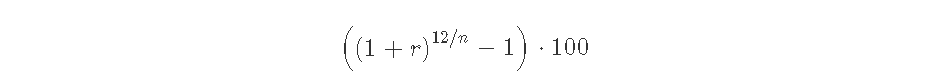

onde r são as taxas de retorno e n é a quantidade de meses de cada governo.

In [17]:
df_gov_agg['IBOVESPA_D_anual'] = ((1 + df_gov_agg['IBOVESPA_D']/100)**(12./df_gov_agg['Meses']) - 1)*100
df_gov_agg['IBOVESPA_D_DEFL_anual'] = ((1 + df_gov_agg['IBOVESPA_D_DEFL']/100)**(12./df_gov_agg['Meses']) - 1)*100
df_gov_agg

,IBOVESPA_D,IBOVESPA_D_DEFL,Meses,IBOVESPA_D_anual,IBOVESPA_D_DEFL_anual
GOVERNO,,,,,
FHC 1,-84.418567,-89.138794,48,-37.172201,-42.592385
FHC 2,66.096698,18.739626,48,13.524670,4.387602
LULA 1,294.684061,207.855809,48,40.949129,32.460637
LULA 2,55.833877,27.511680,48,11.728886,6.264326
DILMA 1,-27.843992,-43.199362,48,-7.834555,-13.186292
DILMA 2,7.804907,-5.655127,16,5.798351,-4.272056
TEMER,11.717678,8.521060,8,18.081768,13.050123
BOLSONARO 1,32.370880,24.436931,20,18.324717,14.016991


Agora vamos visualizar os dados.

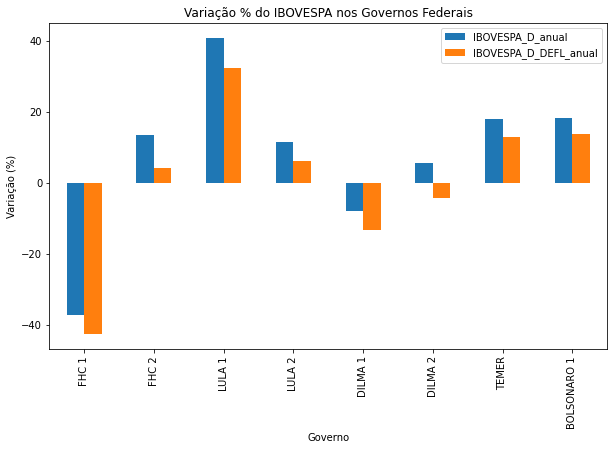

In [18]:
ax = df_gov_agg[['IBOVESPA_D_anual', 'IBOVESPA_D_DEFL_anual']].plot(kind='bar', 
                                                                      figsize=(10,6),
                                                                      title="Variação % do IBOVESPA nos Governos Federais")
ax.set_xlabel("Governo")
ax.set_ylabel("Variação (%)");

<div class="alert alert-block alert-info" style="border-radius:15px">

Os dados anualizados produzem uma mudança de escala significativa onde o governo LULA 1 ainda apresenta um retorno execepcional, entretanto o governo TEMER aparece em destaque. O governo FHC 1 continua liderando como pior caso e o impacto da inflação no governo DILMA 2 ganha destaque, Bolsonaro continua a mesma coisa. <p> <br>
    
    
# Conclusão

A tabela já apresentava os resultados de maneira clara, mas os gráficos são capazes de tornar a compreensão quase que instantânea. A análise deflacionada nos permiter observar que nos períodos de crescimento a figura não é tão boa assim. É importante ficar claro que o IPCA é uma média muito geral, e a inflação medida localmente varia. Estes resultados podem ser bem piores em algumas capitais.

Um gráfico que faltou foi a inflação acumulada em cada período. Vou fazê-la aqui anualizada para facilitar a interpretação.

</div>

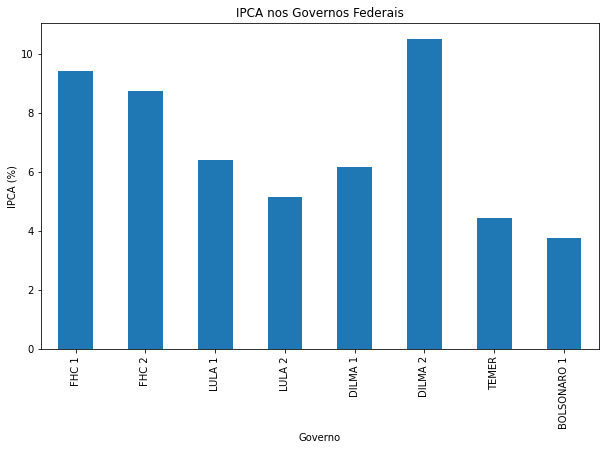

In [19]:
df_infl = df_gov['IPCA'].aggregate(lambda x: 100*(np.prod(1 + x/100)**(12./len(x)) - 1))
df_infl = sort_by_governo(df_infl)
ax      = df_infl.plot(kind    = 'bar', 
                       figsize = (10,6),
                       title   = "IPCA nos Governos Federais")

ax.set_xlabel("Governo")
ax.set_ylabel("IPCA (%)");

Fica aí pra ajudar na interpretação dos demais resultados.

De qualquer formar vimos que é simples fazer uma análise interessante com Python e apresentar os resultados de forma clara e simples. Este é o poder dos dados abertos! O Quandl é muito bom, mas precisamos de mais ferramentas de dados estrutuados com informações do Brasil.